# NLP and Supervised Learning
## Classification of Text Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

This data originally came from Crowdflower's Data for Everyone library.

As the original source says,

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

#### The Goal: Create a Machine Learning Algorithm that can predict if a tweet is positive, neutral, or negative. In the future we could use such an algorithm to automatically read and flag tweets for an airline for a customer service agent to reach out to contact.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

So the question is can we really take in these text about the airlines service that people tweeted and classify them as Positive, Negative or Neutral and create a classification model which would then be able to take in raw string tweets and report back if it thinks that the tweet was Positive, Negative or Neutral.

That way we could have this machine learning algorithm just automatically read Twitter for us and then maybe our customer support service know that they should reach out to that particular person if the tweet is negative.

That way, we don't need actual humans reading thousands and thousands of tweets.

# EDA

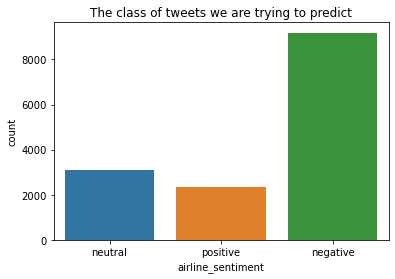

In [5]:
sns.countplot(data=df,x='airline_sentiment')
plt.title('The class of tweets we are trying to predict');

#### So for any such classification case we are trying to have negative versus all other class of tweets, so we mostly care about the tweets that are negative.

#### Now we can check out the negative reasons that most people are giving in for the which the tweets became negative

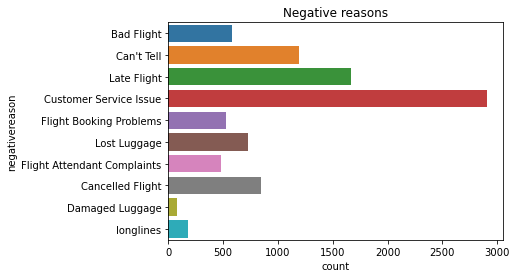

In [6]:
sns.countplot(data=df, y='negativereason')
plt.title('Negative reasons');

And we can see that the most popular reason that somebody associated the negative tweet was with a "customer service issue".

So it's not a good reason that we have customer service issue as the main reason for the negative tweets, from an airline customer service perspective.

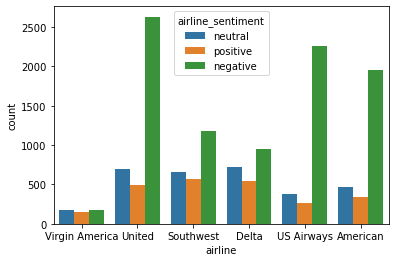

In [7]:
# The diiferent airlines
sns.countplot(data=df, x='airline', hue='airline_sentiment');

We can see that the Virgin America airline is doing quite well. The have about the same no of tweets in neutral and positive as well as in the negative tweets.

Whereas on the other hand, United Airline has the most no. of Negative tweets.

## Setting up the data

And for this particular case, we're going to really focus on just the raw text versus the airline sentiment.

So we're going to have two columns here

In [8]:
data = df[['airline_sentiment', 'text']]

In [9]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [10]:
# Seperating out the features and the label
X = data['text']
y = data['airline_sentiment']

So first we'll perform train_test_split before converting it to vectors to avoid data leakage.

In [11]:
# train_test_split
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Vectorization

In [13]:
# Converting from text to vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer(stop_words='english')

In [15]:
# Fitting only to the training data as we did with feature scaling
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [16]:
X_train_tfidf = tfidf.transform(X_train)

In [17]:
X_test_tfidf = tfidf.transform(X_test)

In [18]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

#### Do not tranform this sparse amtrix to se ethe actual result as the size of matrix is very large and program may crash.

# Model 

We'll build and compare various models.

We'll use all the models with their basic hyperparameter values. Later we can do a GridSearchCV to get the best values.

#### 1.Multinomial Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

#### 2.Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Increasing max_iter to get rid of the warning
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

#### 4.SVM

In [23]:
from sklearn.svm import SVC, LinearSVC

So the SVC and LinearSVC are both the same, the difference is that SVC has rbf as default kernel and SVCLinearSVC hardcodes the kernel to be a linear kernel.

In [24]:
# A - SVC model
svc_model = SVC()
svc_model.fit(X_train_tfidf, y_train)

SVC()

In [25]:
# B - LinearSVC model
linear_svc_model = LinearSVC()
linear_svc_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [27]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [28]:
def accuracy_report(model):
    preds = model.predict(X_test_tfidf)
    
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



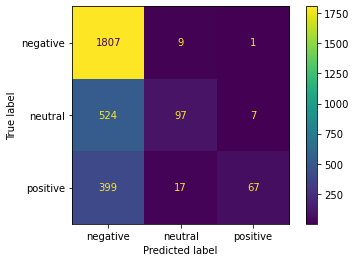

In [29]:
# Accuracy MultinomialNB model
accuracy_report(nb)

We can see that the model is not performing that good on the neutral class, but we really are focussing on is the negative twwets.

Because for the way we framed this problem, we want to make sure our customer service agents can get to those negative reviews or those negative tweets.

-----
We can see that model is pretty good at catching the negative tweets.

----
So notice here that while it found pretty much every single negative tweet, it actually labeled most tweets as negative, which is why I was able to catch those.

So you can see right here really poor F1 scores on neutral and positive, which is what's leading to this good performance on negative.

So that's how we can read this in, which is why it's so nice to have the combination of the confusion matrix with the classifcation report.

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



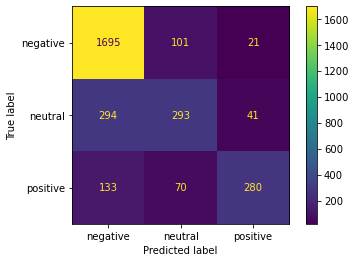

In [30]:
# Accuracy of LR model
accuracy_report(lr_model)

Looks like our F1 scores are performing quite a bit better and we can  see how many were missing.

Still we're not able catch a bit of negative errors, but this time we're performing quite a bit better on all three classes compared to previous model.

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



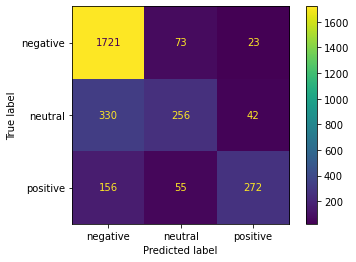

In [31]:
# Accuracy of SVM - SVC - the default with rbf kernel
accuracy_report(svc_model)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



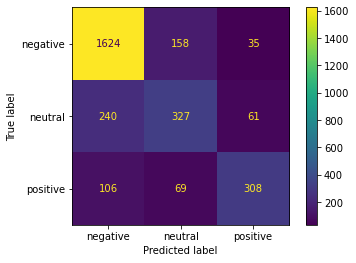

In [32]:
accuracy_report(linear_svc_model)

Both these models are performing the same, even in f1 and recall and precision scores.

#### So if we finally decide to go with the LinearSCV model, it  would be a good call is to finalize this with a pipeline that can be then deployed on new tweets.

## Model Deployment

In [33]:
from sklearn.pipeline import Pipeline

In [36]:
pipe = Pipeline(steps=[('tfidf',TfidfVectorizer()),
                       ('svc',LinearSVC())])

So the whole reason for doing this is that now we have a pipeline that will directly first vectorize for us as well as have this Support vector classifier ready to go.

This is Model deployment, where we assume from our testing of all models and LinearSVC is the best model to go.

In [37]:
# Fitting the model
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

So the original X is the raw tweets ad the reason he model could directly fit on it because of the pipeline we had set which gets the Tf-idf values for them to be used in the model.

In [38]:
# Let's predict some new tweet
pipe.predict(['Good flight service'])

array(['positive'], dtype=object)

In [39]:
X.shape

(14640,)

In [40]:
# This is why pass in data in !D as the X data iself has 1D shape

In [43]:
pipe.predict(['Not a very good service '])

array(['negative'], dtype=object)

In [52]:
pipe.predict(['The flight service could have been better'])

array(['negative'], dtype=object)

In [50]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)

In [55]:
pipe.predict(['The flight service was good but could have been better'])

array(['negative'], dtype=object)